<a href="https://colab.research.google.com/github/omj3424/Python_Programming_Study/blob/main/pandas_exercises/07_Visualization/Chipotle/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [6]:
top5 = chipo.item_name.value_counts().head()
top5

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


Text(0.5, 1.0, "Most ordered Chipotle's Items")

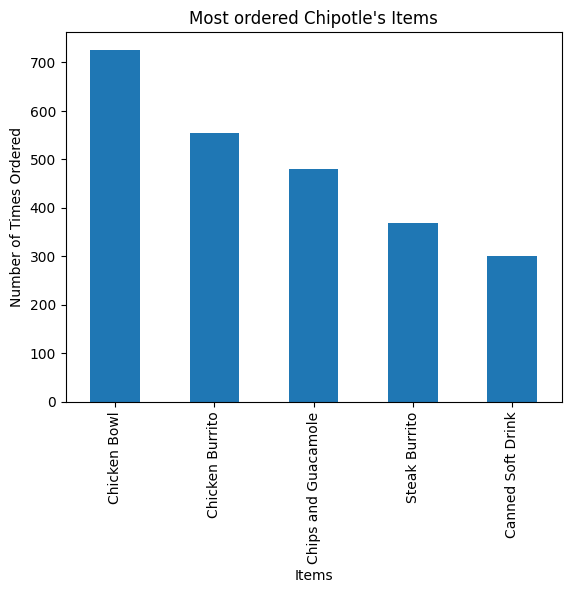

In [14]:
top5.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [15]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [16]:
orders = chipo.groupby('order_id').sum()
orders

,quantity,item_name,choice_description,item_price
order_id,,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,[Clementine][Apple],11.56
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,2,Chicken BowlSide of Chips,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00
5,2,Steak BurritoChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",13.70
...,...,...,...,...
1830,2,Steak BurritoVeggie Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",23.00
1831,3,Carnitas BowlChipsBottled Water,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",12.90
1832,2,Chicken Soft TacosChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",13.20


(0.0, 36.7)

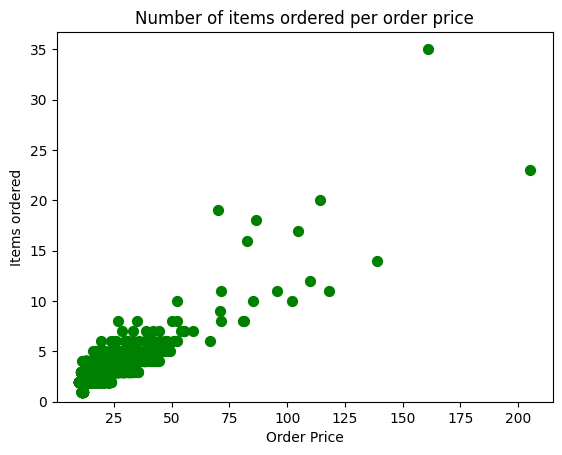

In [17]:
#chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))
#orders = chipo.groupby('order_id').sum()

plt.scatter(x = orders.item_price, y = orders.quantity, s=50, c='green')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

## lim : 범위 지정

### Step 7. BONUS: Create a question and a graph to answer your own question.